<a href="https://colab.research.google.com/github/crna18/B3_Data_Analytics/blob/main/B3_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

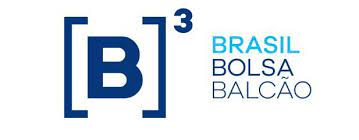

In [ ]:
# Instalando pacotes
# Mercado financeiro B3
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Libs

import pandas as pd
import pandas_datareader.data as web
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


from datetime import datetime

import yfinance as yf
yf.pdr_override()

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Coletando os dados

RRRP = web.get_data_yahoo( 'RRRP3.SA', period='1y' )
ENAT = web.get_data_yahoo( 'ENAT3.SA', period='1y' )
PETR = web.get_data_yahoo( 'PETR4.SA', period='1y' )
PRIO = web.get_data_yahoo( 'PRIO3.SA', period='1y' )
VBBR = web.get_data_yahoo( 'VBBR3.SA', period='1y' )
UGPA = web.get_data_yahoo( 'UGPA3.SA', period='1y' )
RECV = web.get_data_yahoo( 'RECV3.SA', period='1y' )

PETR.shape


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


(252, 6)

### Primeiros registros

In [ ]:
RRRP.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-28,44.049999,45.459999,43.799999,45.000000,45.000000,4574500
2022-04-29,45.500000,48.070000,45.330002,46.230000,46.230000,8661100
2022-05-02,46.000000,46.360001,42.849998,43.869999,43.869999,7204200
2022-05-03,43.990002,43.990002,42.660000,43.560001,43.560001,4389000
2022-05-04,44.509998,45.830002,43.599998,45.599998,45.599998,5669900


In [ ]:
ENAT.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-28,20.170000,21.870001,20.170000,21.730000,21.456551,2473400
2022-04-29,22.000000,22.320000,20.639999,20.639999,20.380268,2707400
2022-05-02,20.580000,20.580000,19.250000,19.629999,19.382977,2459100
2022-05-03,19.620001,20.820000,19.540001,20.610001,20.350647,2375200
2022-05-04,21.139999,21.930000,20.930000,21.830000,21.555294,2584800


In [ ]:
PETR.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-28,30.450001,30.620001,30.250000,30.260000,17.311047,43298500
2022-04-29,30.750000,31.590000,30.280001,30.280001,17.322493,76243900
2022-05-02,30.170000,30.330000,29.330000,29.980000,17.150867,72456200
2022-05-03,30.120001,30.389999,29.820000,30.250000,17.305328,52531000
2022-05-04,30.600000,32.169998,30.400000,32.070000,18.346510,109417000


In [ ]:
PRIO.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-28,26.490000,26.590000,24.549999,26.280001,26.280001,41121000
2022-04-29,26.549999,28.100000,26.530001,26.700001,26.700001,44551400
2022-05-02,26.400000,26.660000,24.920000,25.150000,25.150000,22070100
2022-05-03,25.129999,25.889999,24.650000,25.830000,25.830000,13087100
2022-05-04,26.110001,27.490000,25.910000,27.330000,27.330000,21482700


In [ ]:
VBBR.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-28,21.660000,21.770000,21.260000,21.770000,20.721252,8194500
2022-04-29,21.980000,22.090000,20.950001,21.120001,20.211288,9623200
2022-05-02,21.120001,21.120001,20.370001,20.809999,19.914625,8803900
2022-05-03,20.650000,21.000000,20.450001,20.629999,19.742371,7667000
2022-05-04,20.510000,21.160000,20.180000,21.160000,20.249565,10451200


In [ ]:
UGPA.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-28,13.50,13.90,13.47,13.77,13.257709,16568700
2022-04-29,13.90,14.13,13.07,13.07,12.583750,14777600
2022-05-02,13.00,13.09,12.35,12.58,12.111980,11564600
2022-05-03,12.56,12.57,12.16,12.36,11.900165,7547100
2022-05-04,12.28,12.91,12.16,12.87,12.391191,12345900


In [ ]:
RECV.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-28,23.969999,24.889999,23.740000,24.889999,23.833338,501200
2022-04-29,25.200001,25.840000,24.690001,25.290001,24.216358,1584600
2022-05-02,25.400000,25.400000,23.370001,23.950001,22.933247,1143600
2022-05-03,24.049999,24.629999,23.670000,24.629999,23.584375,813800
2022-05-04,25.500000,25.600000,24.530001,25.600000,24.513197,1346200


### Últimos registros

In [ ]:
RRRP.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-24,27.350000,27.559999,26.700001,27.450001,27.450001,6680100
2023-04-25,27.280001,27.950001,26.900000,27.700001,27.700001,5323000
2023-04-26,27.770000,28.160000,27.200001,27.200001,27.200001,6368400
2023-04-27,27.209999,30.809999,27.209999,30.440001,30.440001,20933600
2023-04-28,30.440001,32.389999,29.799999,31.670000,31.670000,9915000


In [ ]:
ENAT.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-24,11.74,11.74,11.29,11.36,11.36,1373700
2023-04-25,11.21,11.38,11.12,11.26,11.26,1321700
2023-04-26,11.31,11.36,11.08,11.11,11.11,1273400
2023-04-27,11.00,11.24,10.95,11.08,11.08,1477200
2023-04-28,11.08,11.55,10.91,11.55,11.55,2256800


In [ ]:
PETR.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-24,26.600000,27.260000,26.500000,27.200001,24.338547,43820900
2023-04-25,27.160000,27.500000,26.719999,27.090000,24.240118,53854100
2023-04-26,27.120001,27.219999,26.750000,26.750000,23.935886,40249400
2023-04-27,26.850000,27.180000,25.910000,26.100000,23.354267,115632700
2023-04-28,23.600000,24.049999,23.150000,23.700001,23.700001,81138500


In [ ]:
PRIO.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-24,34.099998,35.340000,34.000000,35.029999,35.029999,10166000
2023-04-25,35.200001,35.650002,34.360001,34.650002,34.650002,9599800
2023-04-26,34.869999,35.200001,33.389999,33.500000,33.500000,10958500
2023-04-27,33.799999,33.869999,33.160000,33.639999,33.639999,10873000
2023-04-28,33.639999,35.070000,33.509998,34.750000,34.750000,9144700


In [ ]:
VBBR.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-24,13.29,13.36,13.05,13.24,13.24,7772000
2023-04-25,13.25,13.43,13.14,13.33,13.33,5258100
2023-04-26,13.33,13.33,13.03,13.06,13.06,7090600
2023-04-27,13.16,13.20,13.00,13.13,13.13,6274800
2023-04-28,13.21,13.39,12.97,13.20,13.20,29566900


In [ ]:
UGPA.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-28,13.50,13.90,13.47,13.77,13.257709,16568700
2022-04-29,13.90,14.13,13.07,13.07,12.583750,14777600
2022-05-02,13.00,13.09,12.35,12.58,12.111980,11564600
2022-05-03,12.56,12.57,12.16,12.36,11.900165,7547100
2022-05-04,12.28,12.91,12.16,12.87,12.391191,12345900


In [ ]:
RECV.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-24,20.059999,20.219999,19.860001,20.129999,19.663620,1450800
2023-04-25,20.000000,20.160000,19.379999,19.760000,19.302193,1633400
2023-04-26,19.770000,19.799999,19.070000,19.170000,18.725863,2130100
2023-04-27,18.850000,19.230000,18.500000,19.049999,19.049999,1833100
2023-04-28,19.020000,19.680000,18.760000,19.680000,19.680000,2584300


##Ação: PETR4

In [ ]:
# Estatística descritiva
PETR.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,28.424484,28.944524,27.920476,28.454167,22.002042,7.963736e+07
std,3.797636,3.860068,3.746127,3.813989,2.610517,3.691561e+07
min,21.000000,22.110001,20.770000,21.469999,16.760126,2.876520e+07
25%,25.347500,25.877500,24.902500,25.372499,19.988846,5.516845e+07
50%,27.884999,28.215000,27.080000,27.685000,22.012066,7.171945e+07
75%,31.605000,32.242499,31.022501,31.745000,23.768111,9.391400e+07
max,37.650002,38.389999,36.849998,37.720001,29.531094,3.195016e+08


In [ ]:
# Informações
PETR.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-04-28 to 2023-04-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [ ]:
# Media Móvel
Lista = [11, 12, 13, 15, 16, 17]

from statistics import mean as Media
print(f'Media: { Media(Lista) }')
print(f'Media: { (11+12+13+15+16+17) / len(Lista) }')

Media: 14
Media: 14.0


In [ ]:
Media(Lista)

14

In [ ]:
# Período da Média Móvel

n = 5

for Intervalo in range(3):
  print(f'{Intervalo}ª Dia: {sum(Lista[Intervalo:n]) / 5 }')

0ª Dia: 13.4
1ª Dia: 11.2
2ª Dia: 8.8


In [ ]:
Periodo = 5
PETR['Media_Movel'] = PETR['Close'].rolling (window=Periodo ).mean()

In [ ]:
# Criando a Figura
Figura = make_subplots(
    rows=2,
    cols=1,
    specs=[
        [{'type':'scatter'}],
        [{'type':'scatter'}]
    ],
    vertical_spacing=0.075,
    shared_xaxes=True,
    subplot_titles=('Cotação', 'Fechamento')
)

# Layout e Dimensão
Figura.update_layout(
    width=1000,
    height=800,
    title_text='<b>Advanced Analytics</b> <br>Follow-up Petrobras'
)

# Adicionado um gráfico na 1º Posição
Figura.add_trace(
    go.Candlestick(
        x=PETR.index,
        open=PETR['Open'],
        high=PETR['High'],
        low=PETR['Low'],
        close=PETR['Close'],
        increasing_line_color='red',
        decreasing_line_color='green'
    ),
    row=1, col=1
)

# Adicionado um gráfico na 2º Posição
Figura.add_trace(
    go.Scatter(
        x=PETR.index,
        y=PETR['Close'],
        mode='lines',
        name='Fechamento',
        line=dict(color='green')
    ),
    row=2, col=1
)

Figura.add_trace(
    go.Scatter(
        x=PETR.index,
        y=PETR['Media_Movel'],
        mode='lines',
        name='Média Móvel',
        line=dict(color='yellow')
    ),
    row=1, col=1
)

Figura.update_layout(
    xaxis_rangeslider_visible=False
)

Figura.add_trace(
    go.Scatter(
        x=PETR.index,
        y=PETR['Media_Movel'],
        mode='lines',
        name='Média Móvel',
        line=dict(color='red')
    ),
    row=2, col=1
)

Figura.update_layout(
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1,
        font=dict( size=10)
    )
)

Figura.add_annotation(
    showarrow=False,
    text='Análise em Python',
    font=dict(size=14),
    xref='x domain',
    x=1,
    yref='y domain',
    y=-1.4
)

Figura.add_annotation(
    showarrow=False,
    text='By: @Celso Araújo',
    font=dict(size=14),
    xref='x domain',
    x=0,
    yref='y domain',
    y=-1.4
)

Figura.add_vrect(x0='2022-10-30', x1='2022-12-14', annotation_text="decline", annotation_position="top left", line_width=0, fillcolor="purple", opacity=0.2)

Figura.show()


ValueError: ignored

Análise da cotação PETR4 correspondendo a dois momentos (pré  e  pós) eleição 2022:

Como a maior produtora brasileira de petróleo e gás do país, podemos analisar que no primeiro dia útil da bolsa após o 2º turno da eleição (31/10/2022) a ação aos 30,61 reais (abertura) e 32,316 reais (média) teve um forte declínio nos dias posteriores devido a incertezas do mercado em relação ao plano econômico do novo governo, chegando ao mínimo valor de 21,47 reais no dia 14/12/2022 em seu fechamento e 23,638 reais de média conforme indicado no gráfico.

## Comparação das empresas exploradoras de petróleo e gás, cotação entre mar/2022 e mar/2023.





In [ ]:
RRRP['Close'].plot(figsize=(20,10), color='orange',label='3R Petroleum')
ENAT['Close'].plot(figsize=(20,10), color='blue',label='Enauta')
PETR['Close'].plot(figsize=(20,10), color='black', label='Petrobras')
PRIO['Close'].plot(figsize=(20,10), color='red',label='PetroRio')
VBBR['Close'].plot(figsize=(20,10), color='purple', label='Vibra Energia')
UGPA['Close'].plot(figsize=(20,10), color='green', label='Ultrapar')
RECV['Close'].plot(figsize=(20,10), color='brown',label='Petrorecôncavo')

plt.ylim(0, 60)
plt.yticks(np.arange(0, 56, 5))
plt.margins(x=0)
plt.xlabel('Ano')
plt.ylabel('Valor em R$')
plt.legend()
plt.grid()
plt.title('Comparação das cotações das empresas de Óleo & Gás')
plt.show()

# Exportando PDF

In [ ]:
#!pip install -U kaleido

In [ ]:
Figura.write_image('Report_Financeiro.pdf')